In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
file_name = 'realistic_housing_data.xlsx'
df = pd.read_excel(file_name)

In [5]:
print(f"\n Data Shape: {df.shape}")
print(f"\n Data Types: \n{df.dtypes}")
print(f"\n Columns: \n{df.columns.tolist()}")
print(f"\n Missing Values: \n{df.isnull().sum()}")
print(f"\n Statistical Summary: \n{df.describe()}")
print(f"\n First 5 Rows: \n{df.head()}")
print(df.info())


 Data Shape: (5000, 15)

 Data Types: 
bedrooms          int64
bathrooms         int64
sqft              int64
lot_size          int64
age               int64
year_built        int64
garage            int64
location         object
house_type       object
condition         int64
has_pool          int64
has_fireplace     int64
has_basement      int64
school_rating     int64
price             int64
dtype: object

 Columns: 
['bedrooms', 'bathrooms', 'sqft', 'lot_size', 'age', 'year_built', 'garage', 'location', 'house_type', 'condition', 'has_pool', 'has_fireplace', 'has_basement', 'school_rating', 'price']

 Missing Values: 
bedrooms         0
bathrooms        0
sqft             0
lot_size         0
age              0
year_built       0
garage           0
location         0
house_type       0
condition        0
has_pool         0
has_fireplace    0
has_basement     0
school_rating    0
price            0
dtype: int64

 Statistical Summary: 
         bedrooms    bathrooms         sqft   

In [ ]:
print(df.head())

   bedrooms  bathrooms  sqft  lot_size  age  year_built  garage  location  \
0         3          5  2229     12569   38        1986       1     Rural   
1         3          2  1897      8942   27        1997       3     Rural   
2         4          2  2397      4826   46        1978       0  Downtown   
3         5          3  2849      2490   39        1985       2     Hills   
4         2          3  1895     11910   41        1983       1  Downtown   

  house_type  condition  has_pool  has_fireplace  has_basement  school_rating  \
0      Condo          4         0              1             0             10   
1  Townhouse          3         0              0             1              3   
2  Townhouse          2         0              0             0              6   
3      House          3         0              1             1              4   
4  Townhouse          4         0              0             0              5   

    price  
0  199148  
1  152932  
2  230854  
3 

In [7]:
df.isnull().sum()

bedrooms         0
bathrooms        0
sqft             0
lot_size         0
age              0
year_built       0
garage           0
location         0
house_type       0
condition        0
has_pool         0
has_fireplace    0
has_basement     0
school_rating    0
price            0
dtype: int64

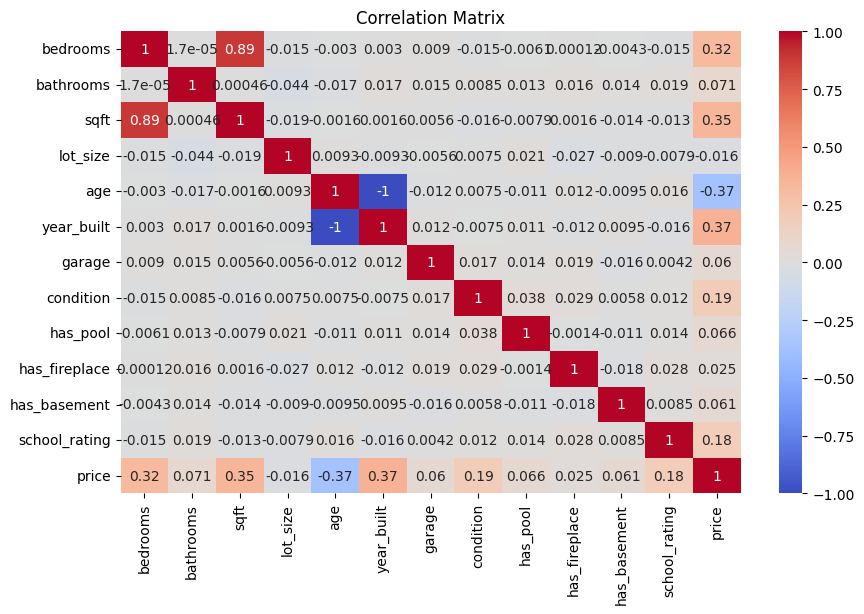

In [11]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True , cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [12]:
x = df.drop('price', axis=1)
y = df['price']

In [13]:
categorical_features = x.select_dtypes(include=['object']).columns
numerical_features = x.select_dtypes(include=['int64', 'float64']).columns

In [14]:
print(categorical_features)
print(numerical_features)

Index(['location', 'house_type'], dtype='object')
Index(['bedrooms', 'bathrooms', 'sqft', 'lot_size', 'age', 'year_built',
       'garage', 'condition', 'has_pool', 'has_fireplace', 'has_basement',
       'school_rating'],
      dtype='object')


In [20]:
df.head()

,bedrooms,bathrooms,sqft,lot_size,age,year_built,garage,location,house_type,condition,has_pool,has_fireplace,has_basement,school_rating,price
0,3,5,2229,12569,38,1986,1,Rural,Condo,4,0,1,0,10,199148
1,3,2,1897,8942,27,1997,3,Rural,Townhouse,3,0,0,1,3,152932
2,4,2,2397,4826,46,1978,0,Downtown,Townhouse,2,0,0,0,6,230854
3,5,3,2849,2490,39,1985,2,Hills,House,3,0,1,1,4,263271
4,2,3,1895,11910,41,1983,1,Downtown,Townhouse,4,0,0,0,5,274804


In [18]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state=42)
processor = ColumnTransformer(transformers=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'), categorical_features),
    ("scale", StandardScaler(), numerical_features)
])

In [19]:
df.head()

,bedrooms,bathrooms,sqft,lot_size,age,year_built,garage,location,house_type,condition,has_pool,has_fireplace,has_basement,school_rating,price
0,3,5,2229,12569,38,1986,1,Rural,Condo,4,0,1,0,10,199148
1,3,2,1897,8942,27,1997,3,Rural,Townhouse,3,0,0,1,3,152932
2,4,2,2397,4826,46,1978,0,Downtown,Townhouse,2,0,0,0,6,230854
3,5,3,2849,2490,39,1985,2,Hills,House,3,0,1,1,4,263271
4,2,3,1895,11910,41,1983,1,Downtown,Townhouse,4,0,0,0,5,274804


In [22]:
pipline = Pipeline([
    ('preprocessor', processor),
    ('model', RandomForestRegressor(random_state=42))
])

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
pipline.fit(x_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocessor', ...), ('model', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('onehot', ...), ('scale', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transforme

In [25]:
predictions = pipline.predict(x_test)
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R^2 Score: {r2}")



Mean Absolute Error: 38710.337100000004
Mean Squared Error: 2775797940.0097466
Root Mean Squared Error: 52685.841931298266
R^2 Score: 0.8818108556272296


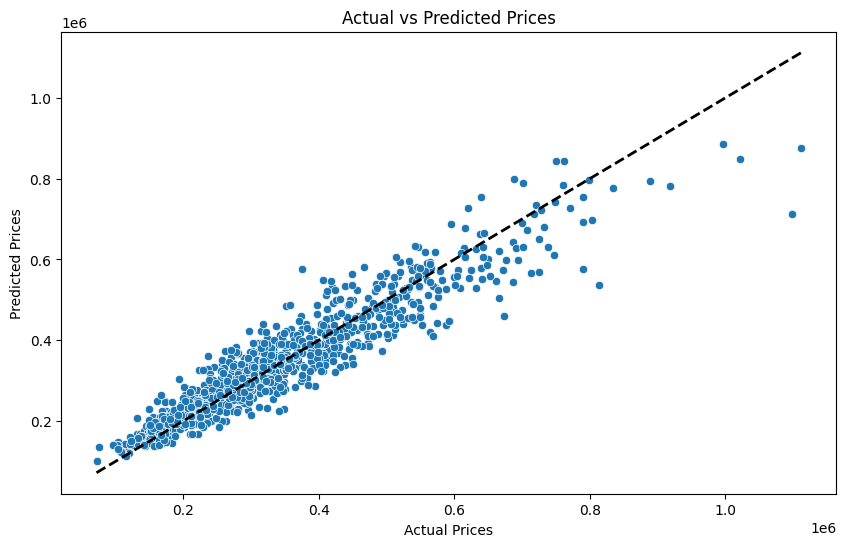

In [26]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=predictions)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()